In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from datetime import datetime

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Netflix%20Stock%20Price%20(All%20Time)/netflix.csv")

In [3]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429


In [4]:
df.isnull().any()

Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4881 non-null   object 
 1   High       4881 non-null   float64
 2   Low        4881 non-null   float64
 3   Open       4881 non-null   float64
 4   Close      4881 non-null   float64
 5   Volume     4881 non-null   float64
 6   Adj Close  4881 non-null   float64
dtypes: float64(6), object(1)
memory usage: 267.1+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999820,0.999864,0.999869,-0.248897,0.999869
Low,0.999820,1.000000,0.999859,0.999862,-0.251533,0.999862
Open,0.999864,0.999859,1.000000,0.999707,-0.250253,0.999707
Close,0.999869,0.999862,0.999707,1.000000,-0.250103,1.000000
Volume,-0.248897,-0.251533,-0.250253,-0.250103,1.000000,-0.250103
Adj Close,0.999869,0.999862,0.999707,1.000000,-0.250103,1.000000


<AxesSubplot:xlabel='Date'>

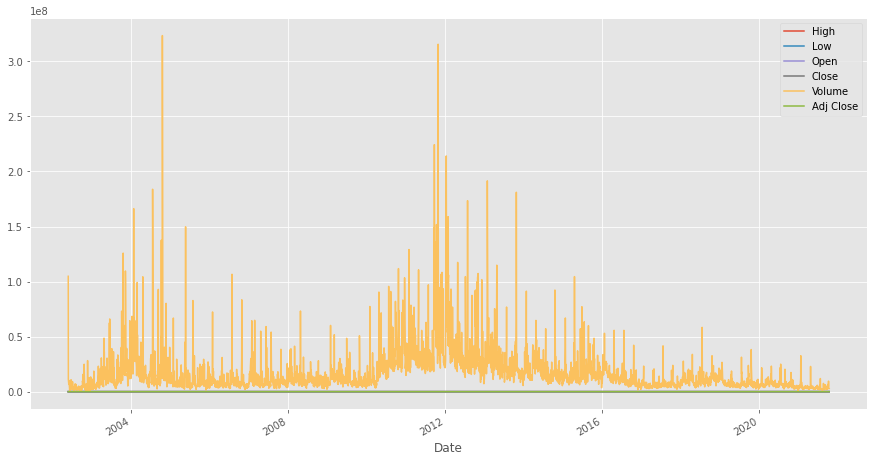

In [7]:
df.plot(figsize = (15,8))

Text(0.5, 1.0, 'Open and Close Prices')

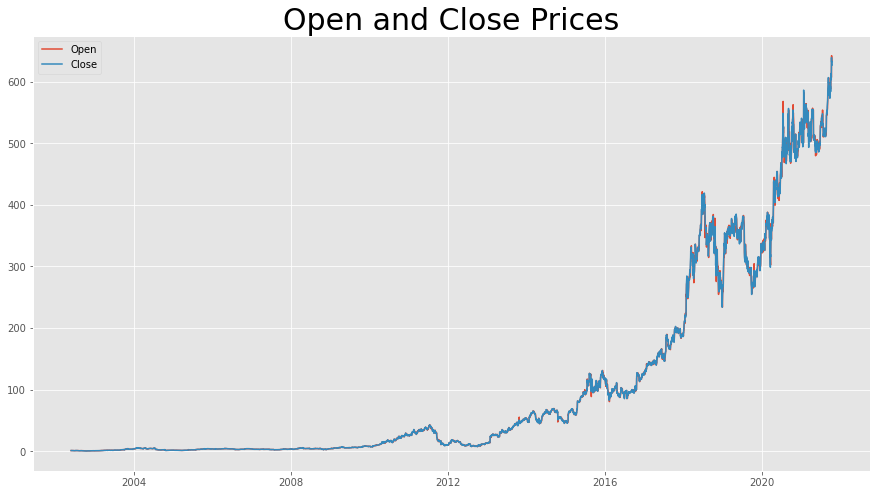

In [8]:
plt.figure(figsize = (15,8))
plt.plot(df['Open'])
plt.plot(df['Close'])
plt.legend(['Open','Close'])
plt.title('Open and Close Prices', fontsize = 30)

Text(0.5, 1.0, 'High and Low Stock Prices')

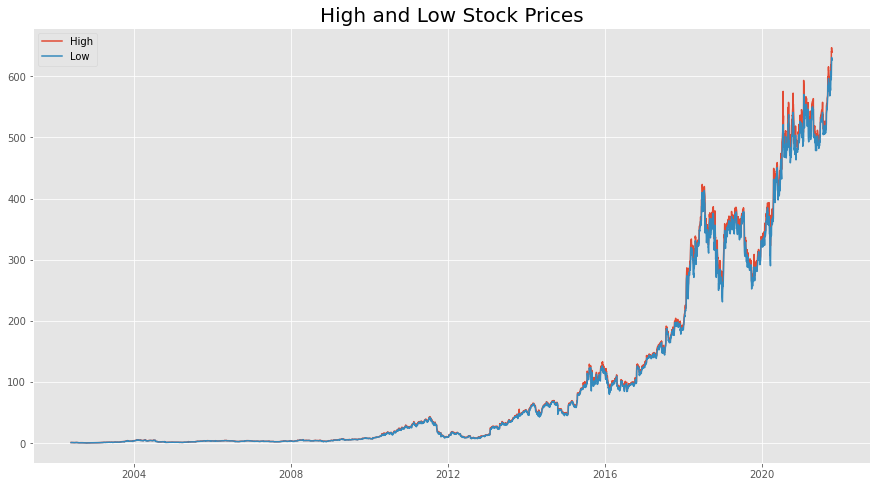

In [9]:
plt.figure(figsize =(15,8))
plt.plot(df['High'])
plt.plot(df['Low'])
plt.legend(['High','Low'])
plt.title('High and Low Stock Prices', fontsize = 20)

Text(0.5, 1.0, 'Close Prices and Mean Average')

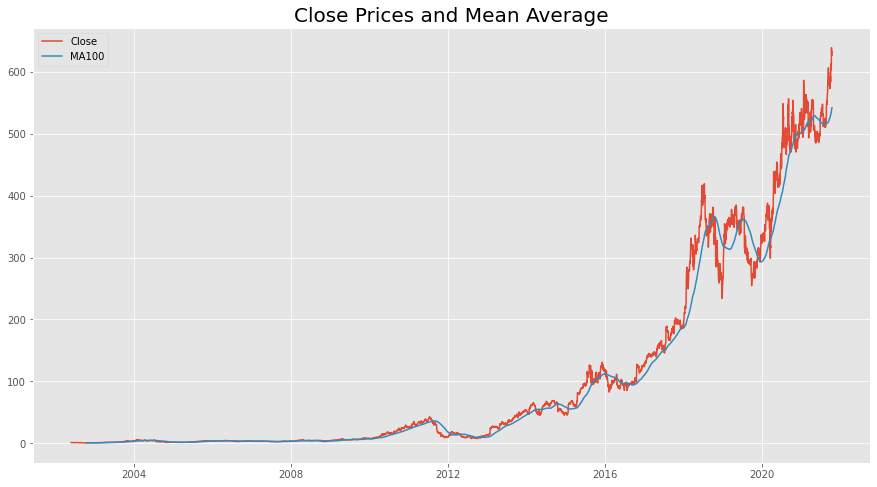

In [10]:
df['MA30'] = df['Adj Close'].rolling(window = 30).mean()
df['MA100'] = df['Adj Close'].rolling(window = 100).mean()
plt.figure(figsize = (15,8))
plt.plot(df['Close'])
plt.plot(df['MA100'])
plt.legend(['Close','MA100'])
plt.title('Close Prices and Mean Average', fontsize = 20)

Text(0.5, 1.0, 'Netflix Cumulative Returns')

<Figure size 1440x720 with 0 Axes>

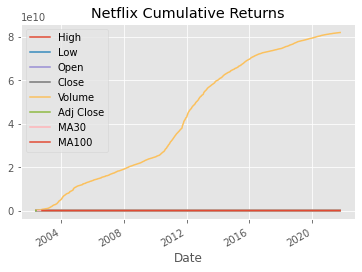

In [11]:
df1 = df.cumsum()
plt.figure(figsize = (20,10))
df1.plot()
plt.title('Netflix Cumulative Returns')

Text(0.5, 1.0, 'Netflix Autocorrelation Plot')

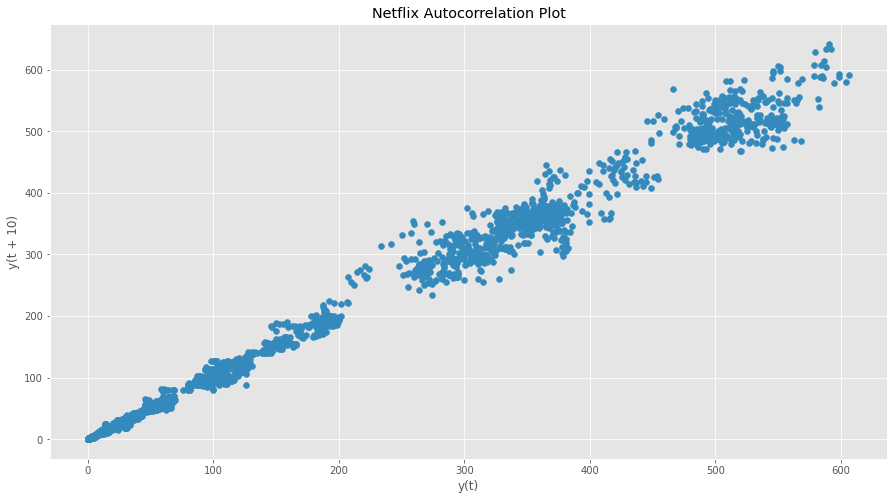

In [12]:
from pandas.plotting import lag_plot
plt.figure(figsize =(15,8))
lag_plot(df['Open'],lag = 10)
plt.title('Netflix Autocorrelation Plot')

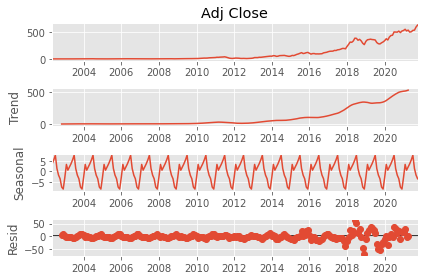

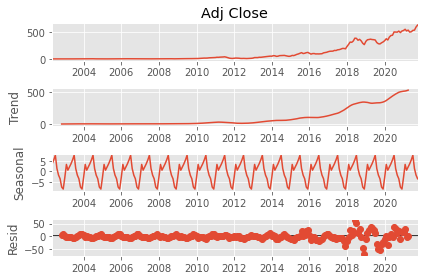

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

netflix_month = df['Adj Close'].resample('MS').mean()

decomposition = seasonal_decompose(netflix_month, model ='additive')
decomposition.plot()

In [14]:
df['PriceChange'] = df['Adj Close'].pct_change()
df.dropna()

,High,Low,Open,Close,Volume,Adj Close,MA30,MA100,PriceChange
Date,,,,,,,,,
2002-10-14,0.535000,0.463571,0.464286,0.534286,5272400.0,0.534286,0.716881,0.926643,0.135054
2002-10-15,0.585714,0.542143,0.542857,0.550000,4125800.0,0.550000,0.704381,0.920179,0.029411
2002-10-16,0.532857,0.442857,0.529286,0.459286,5800200.0,0.459286,0.688738,0.912671,-0.164935
2002-10-17,0.585714,0.471429,0.472143,0.550000,7481600.0,0.550000,0.676476,0.906600,0.197511
2002-10-18,0.735714,0.585714,0.585714,0.682857,24904600.0,0.682857,0.668762,0.902393,0.241558
...,...,...,...,...,...,...,...,...,...
2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998,586.780332,536.136099,0.052142
2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976,589.636666,537.593399,0.006758
2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976,592.445664,539.022499,-0.011344


Text(0.5, 1.0, 'Price Change')

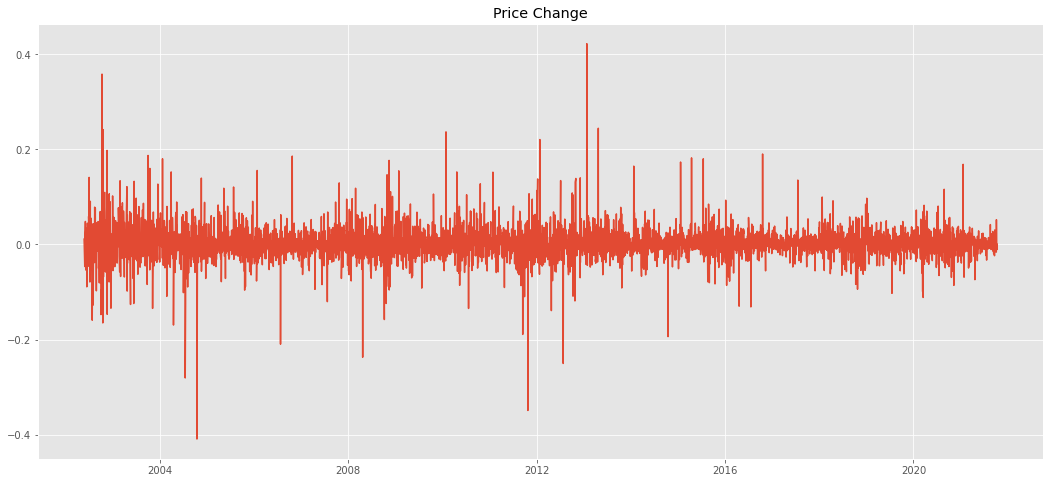

In [15]:
plt.figure(figsize = (18,8))
plt.plot(df['PriceChange'])
plt.title('Price Change')

In [16]:
df['upmove'] = df['PriceChange'].apply(lambda x: x if x > 0 else 0)
df['downmove'] = df['PriceChange'].apply(lambda x: abs(x) if x < 0 else 0)
df['avg up'] = df['upmove'].ewm(span =19).mean()
df['avg down'] = df['downmove'].ewm(span =19).mean()
df.dropna()

,High,Low,Open,Close,Volume,Adj Close,MA30,MA100,PriceChange,upmove,downmove,avg up,avg down
Date,,,,,,,,,,,,,
2002-10-14,0.535000,0.463571,0.464286,0.534286,5272400.0,0.534286,0.716881,0.926643,0.135054,0.135054,0.000000,0.046772,0.046604
2002-10-15,0.585714,0.542143,0.542857,0.550000,4125800.0,0.550000,0.704381,0.920179,0.029411,0.029411,0.000000,0.045036,0.041944
2002-10-16,0.532857,0.442857,0.529286,0.459286,5800200.0,0.459286,0.688738,0.912671,-0.164935,0.000000,0.164935,0.040532,0.054243
2002-10-17,0.585714,0.471429,0.472143,0.550000,7481600.0,0.550000,0.676476,0.906600,0.197511,0.197511,0.000000,0.056231,0.048819
2002-10-18,0.735714,0.585714,0.585714,0.682857,24904600.0,0.682857,0.668762,0.902393,0.241558,0.241558,0.000000,0.074764,0.043937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998,586.780332,536.136099,0.052142,0.052142,0.000000,0.011874,0.004332
2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976,589.636666,537.593399,0.006758,0.006758,0.000000,0.011363,0.003899
2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976,592.445664,539.022499,-0.011344,0.000000,0.011344,0.010226,0.004643


In [17]:
df['RS'] = df['avg up'] / df['avg down']
df['RSI'] = df['RS'].apply(lambda x: 100 - (100/(x+1)))
df['MA200'] = df['Adj Close'].rolling(window = 200).mean()
df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'
df.dropna()

,High,Low,Open,Close,Volume,Adj Close,MA30,MA100,PriceChange,upmove,downmove,avg up,avg down,RS,RSI,MA200,Buy
Date,,,,,,,,,,,,,,,,,
2003-03-10,1.164286,1.122143,1.141429,1.123571,3424400.0,1.123571,1.008500,0.818907,-0.022375,0.000000,0.022375,0.019189,0.013331,1.439426,59.006746,0.872775,No
2003-03-11,1.125000,1.071429,1.123571,1.107143,5531400.0,1.107143,1.016167,0.824479,-0.014621,0.000000,0.014621,0.017270,0.013460,1.283065,56.199227,0.872329,No
2003-03-12,1.107857,1.064286,1.103571,1.075714,5751200.0,1.075714,1.022143,0.830643,-0.028388,0.000000,0.028388,0.015543,0.014953,1.039477,50.967824,0.871657,No
2003-03-13,1.183571,1.089286,1.097143,1.160714,7560000.0,1.160714,1.031452,0.836750,0.079017,0.079017,0.000000,0.021890,0.013457,1.626640,61.928554,0.871675,No
2003-03-14,1.210714,1.170714,1.185714,1.182143,6129200.0,1.182143,1.040786,0.841743,0.018462,0.018462,0.000000,0.021548,0.012112,1.779070,64.016741,0.872068,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998,586.780332,536.136099,0.052142,0.052142,0.000000,0.011874,0.004332,2.741126,73.270081,531.828499,No
2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976,589.636666,537.593399,0.006758,0.006758,0.000000,0.011363,0.003899,2.914464,74.453716,532.351749,No
2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976,592.445664,539.022499,-0.011344,0.000000,0.011344,0.010226,0.004643,2.202418,68.773598,532.866449,No


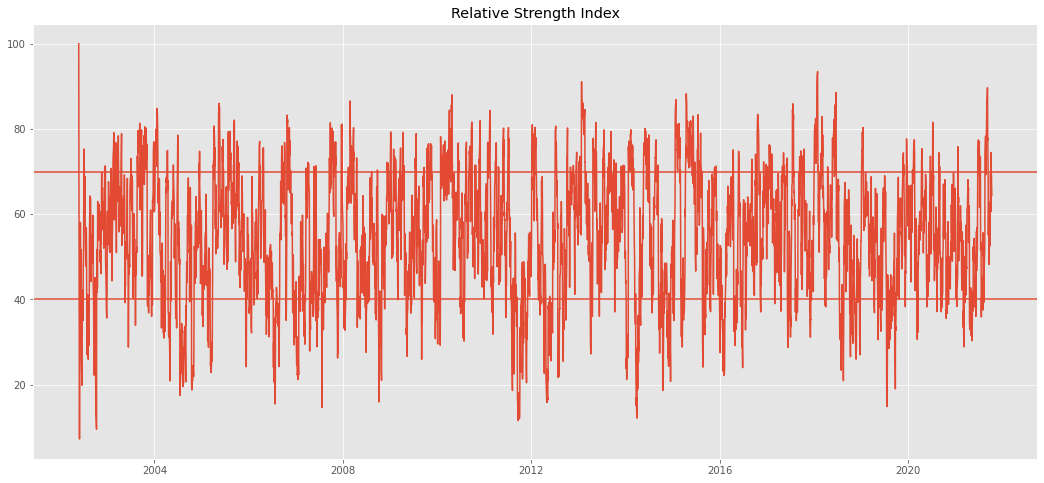

In [18]:
plt.figure(figsize = (18,8))
plt.plot(df['RSI'])
plt.title('Relative Strength Index')
plt.axhline(y = 70)
plt.axhline(y = 40)

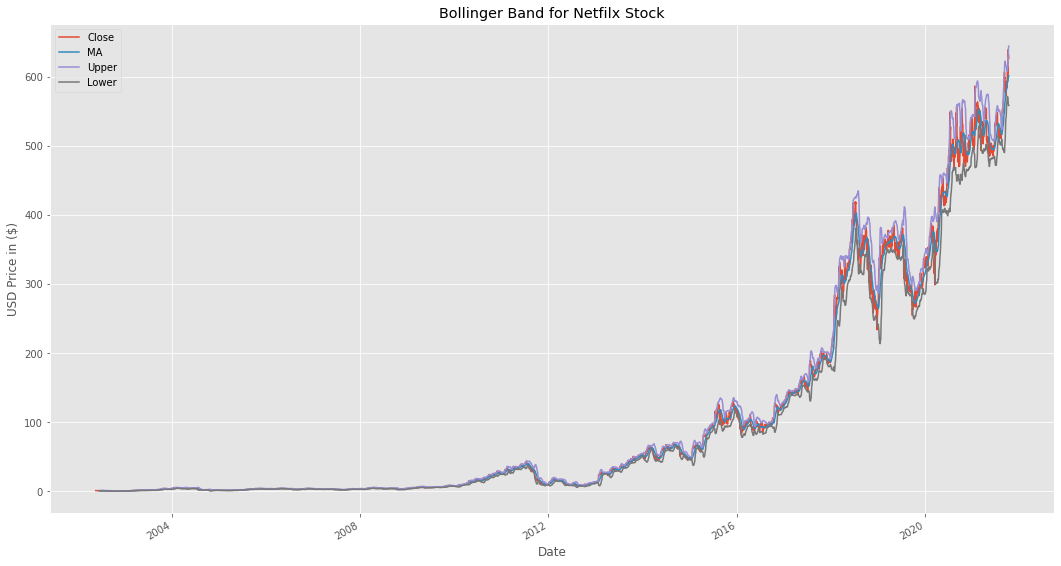

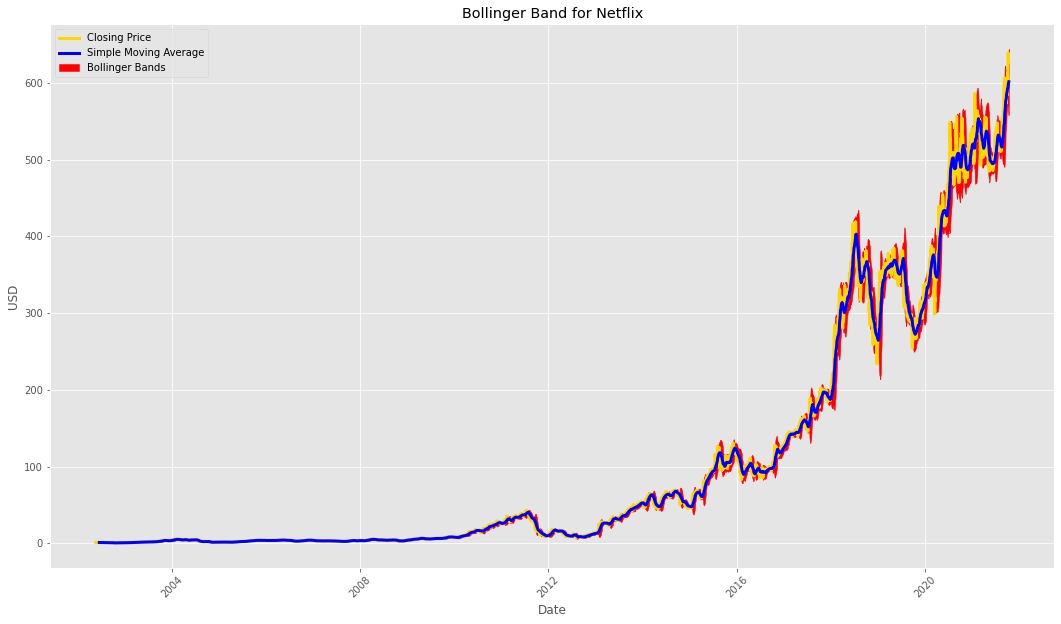

In [19]:
period = 20
df['MA'] = df['Close'].rolling(window = period).mean()
df['STD'] = df['Close'].rolling(window = period).std()
df['Upper'] = df['MA'] + (df['STD'] * 2)
df['Lower'] = df['MA'] - (df['STD'] * 2)
column_list = ['Close','MA','Upper','Lower']
df[column_list].plot(figsize = (18,10))
plt.title('Bollinger Band for Netfilx Stock')
plt.ylabel('USD Price in ($)')
plt.show()

fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(1,1,1)
x_axis = df.index
ax.fill_between(x_axis,df['Upper'], df['Lower'],label ='Bollinger Bands',color = 'red')
ax.plot(x_axis, df['Close'], color = 'gold',lw = 3, label= 'Closing Price')
ax.plot(x_axis, df['MA'], color = 'blue', lw=3, label='Simple Moving Average')
ax.set_title('Bollinger Band for Netflix')
ax.set_xlabel('Date')
ax.set_ylabel('USD')
plt.xticks(rotation = 45)
ax.legend()
plt.show()

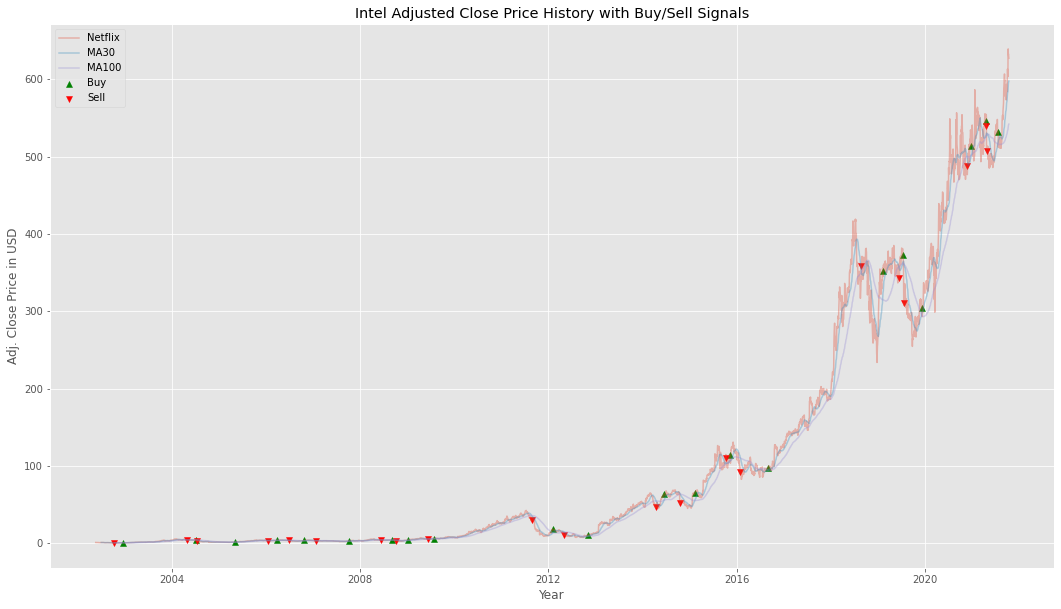

In [20]:
data = pd.DataFrame()
data['Net'] = df['Adj Close']
data['MA30'] = df['MA30']
data['MA100'] = df['MA100']
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1

    for i in range(len(data)):
        if data['MA30'][i] > data['MA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['Net'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['MA30'][i] < data['MA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['Net'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)

    return (sigPriceBuy,sigPriceSell)
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]
plt.figure(figsize=(18,10))
plt.plot(data['Net'], label = 'Netflix', alpha=0.35)
plt.plot(data['MA30'], label = 'MA30', alpha=0.35)
plt.plot(data['MA100'], label = 'MA100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Intel Adjusted Close Price History with Buy/Sell Signals')
plt.xlabel('Year')
plt.ylabel('Adj. Close Price in USD')
plt.legend(loc='upper left')
plt.show()

In [21]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation, Dropout, TimeDistributed
from tensorflow.keras.models import Sequential
train_df = df['High'].iloc[:-4]

X_train = []
y_train = []

for i in range(2, len(train_df)):
  X_train.append(train_df[i-2:i])
  y_train.append(train_df[i])
import math
train_len = math.ceil(len(train_df)*0.8)
train_len

3902

In [22]:
X_train, y_train= np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=300, batch_size=100, verbose=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

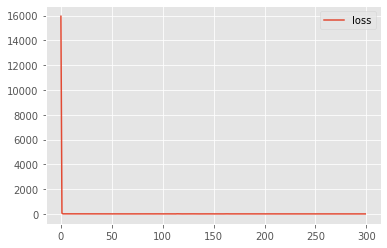

In [23]:
loss_plot = pd.DataFrame(model.history.history)
loss_plot[['loss']].plot()

In [24]:
test_data = train_df[train_len-2:]
X_val=[]
Y_val=[] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
prediction = model.predict(X_val)
from sklearn.metrics import mean_squared_error
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Train rmse: 4.088244371411857
Validation rmse: 8.77161786357314


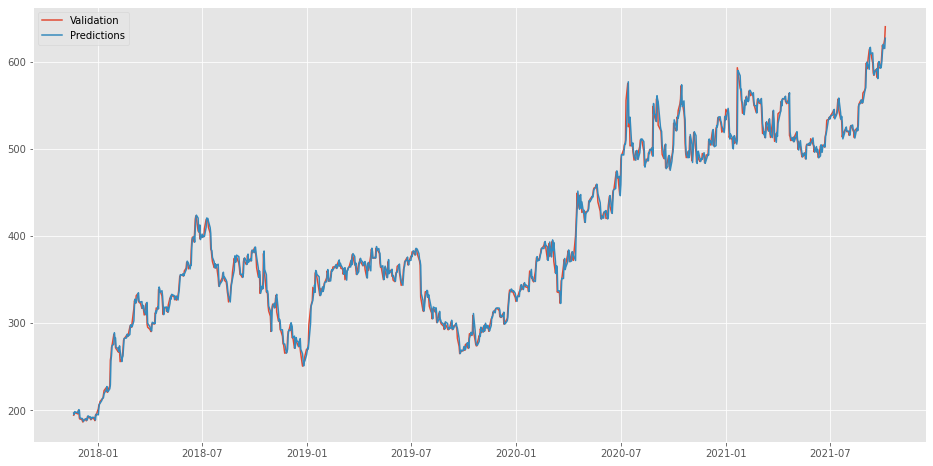

In [25]:
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [26]:
variance = []
for i in range(len(valid)):
  
  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

,0
count,975.000000
mean,-0.169479
std,8.774481
min,-51.670898
25%,-4.539902
50%,-0.424957
75%,3.864563
max,83.283966


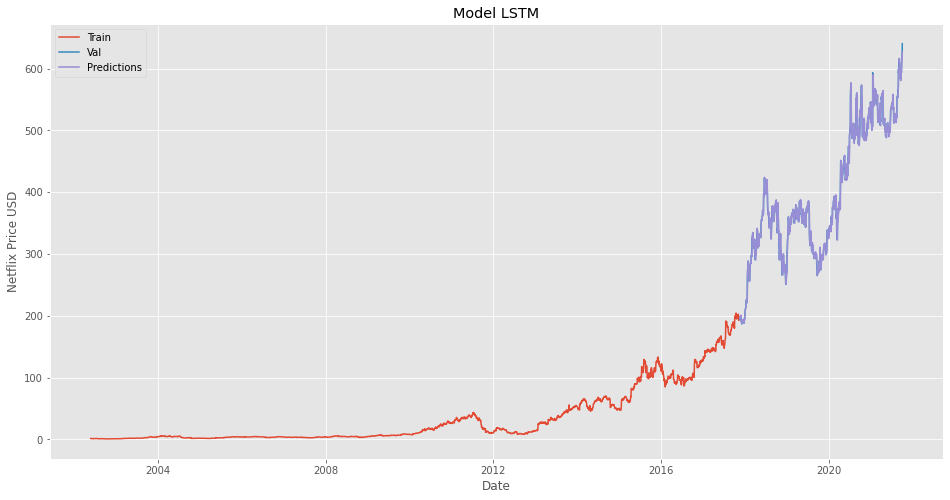

In [27]:
train = train_df[:train_len]
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Netflix Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()